In [58]:
import torch
from torch import nn
# trochvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 1.12.1
torchvision version: 0.13.1


In [9]:
from pathlib import Path
torch_home = Path('E:\Torch_Home')
torch_home.mkdir(exist_ok=True)
dataset_path = torch_home / 'datasets'
dataset_path

WindowsPath('E:/Torch_Home/datasets')

In [10]:
train_data = datasets.FashionMNIST(
    root=dataset_path,
    train=True, download=True,
    transform=ToTensor() 
)

In [11]:
test_data = datasets.FashionMNIST(
    root=dataset_path,
    train=False, download=True,
    transform=ToTensor() 
)

In [62]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [63]:
image.shape

torch.Size([1, 28, 28])

In [64]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [12]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [66]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Text(0.5, 1.0, '9')

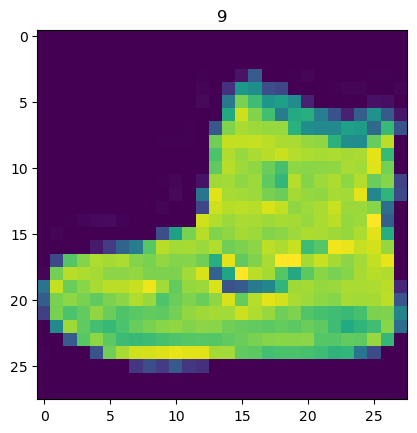

In [67]:
# show image
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

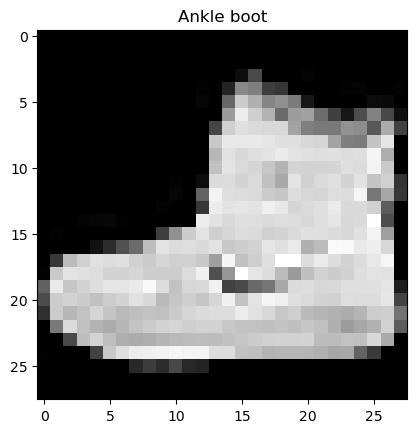

In [68]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

In [69]:
# Use 'o' to toggle output
for i in range(1, 17):
    # tensor.item() returns 0D tensors as python ints
    random = torch.randint(0, len(train_data), size=[1]).item()
    #random = torch.randint(0, len(train_data), size=[2])
    print(random)

56274
1574
43881
9788
19128
10415
56482
48797
44297
6629
30449
48657
54340
34260
12700
15334


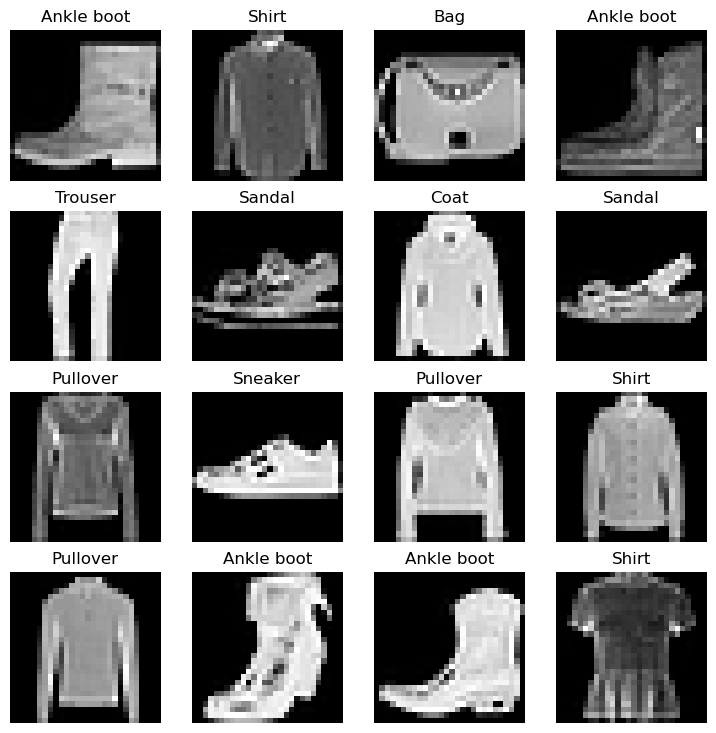

In [70]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random]
    fig.add_subplot(rows,cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [27]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                          batch_size=BATCH_SIZE,
                          shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE,
                         shuffle=False)
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [72]:
train_feat_batch, train_label_batch = next(iter(train_dataloader))
train_feat_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


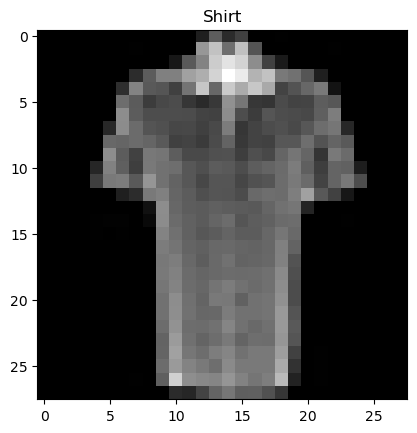

In [73]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_feat_batch), size=[1]).item()
img, label = train_feat_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [74]:
flatten_model = nn.Flatten()
x = train_feat_batch[0]
output = flatten_model(x)
print(f'Shape before flattening: {x.shape} -> [color_channels, height, width] ')
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width] 
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [3]:
from torch import nn
class FachionMNISTModelV0 (nn.Module):
    def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features=hidden_units),
            nn.Linear(in_features= hidden_units, out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)    

In [76]:
torch.manual_seed(42)
model_0 = FachionMNISTModelV0(input_shape=784, hidden_units=20, output_shape=len(class_names))
model_0.to('cpu')

FachionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [77]:
import requests
from pathlib import Path
#with open('helper_functions.py', 'wb') as f:
#    f.write(requests.content)

In [78]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [79]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f'Train time on {device} : {total_time:.3f} secs')
    return total_time

In [80]:
from tqdm.auto import tqdm 
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 10

#Create train and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # Forward Pass
        y_pred = model_0(X)
        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        # zerograd
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (batch%400 == 0):
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            
#average loss per batch per epoch
train_loss /= len(train_dataloader)

### Testing
test_loss, test_acc = 0,0
model_0.eval()
with (torch.inference_mode()):
    for X,y in test_dataloader:
        # forward paass
        test_pred = model_0(X)
        test_loss += loss_fn(test_pred, y)
        test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)    
## Print out what's happening
print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")        

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 10%|█         | 1/10 [00:11<01:42, 11.35s/it]

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 20%|██        | 2/10 [00:22<01:30, 11.34s/it]

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 30%|███       | 3/10 [00:34<01:19, 11.38s/it]

Epoch: 3
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 40%|████      | 4/10 [00:45<01:08, 11.41s/it]

Epoch: 4
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 50%|█████     | 5/10 [00:57<00:57, 11.45s/it]

Epoch: 5
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 60%|██████    | 6/10 [01:08<00:45, 11.45s/it]

Epoch: 6
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 70%|███████   | 7/10 [01:19<00:34, 11.43s/it]

Epoch: 7
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 80%|████████  | 8/10 [01:31<00:22, 11.41s/it]

Epoch: 8
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 90%|█████████ | 9/10 [01:42<00:11, 11.39s/it]

Epoch: 9
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 10/10 [01:53<00:00, 11.38s/it]



Train loss: 0.41563 | Test loss: 0.48632, Test acc: 83.33%

Train time on cpu : 115.327 secs


In [81]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results            

{'model_name': 'FachionMNISTModelV0',
 'model_loss': 0.4863196313381195,
 'model_acc': 83.32667731629392}

In [82]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)    

In [84]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10,
output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [85]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(), lr=0.1)

In [86]:
def train_step(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device):
    train_loss, train_acc = 0 , 0
    for batch, (X,y) in enumerate(data_loader):
        X,y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                        y_pred= y_pred.argmax(dim=1))
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)   
    train_acc /= len (data_loader) 
    print(f'Train loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%')

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device ):
    test_loss, test_acc = 0,0
    model.eval()
    with (torch.inference_mode()):
        for X,y in data_loader:
            X,y = X.to(device) , y.to(device)
            test_pred = model (X)          
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
             y_pred = test_pred.argmax(dim=1))

        test_loss /= len(data_loader)     
        test_acc /= len (data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [87]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f'Train time on {device} : {total_time:.3f} secs')
    return total_time

In [88]:
torch.manual_seed(42)
from timeit import default_timer as timer
from tqdm.auto import tqdm
tic = timer()
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    
    train_step(data_loader=train_dataloader,
    model = model_1,
    loss_fn = loss_fn,
    optimizer = optimizer,
    accuracy_fn=accuracy_fn)

    test_step(data_loader=test_dataloader,
    model = model_1,
    loss_fn=loss_fn,accuracy_fn=accuracy_fn)
toc = timer()
total_train_time_model_1 = print_train_time(start=tic,
                                            end=toc,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train Accuracy: 61.34%


 20%|██        | 1/5 [00:13<00:54, 13.69s/it]

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train Accuracy: 71.93%


 40%|████      | 2/5 [00:27<00:40, 13.56s/it]

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train Accuracy: 75.94%


 60%|██████    | 3/5 [00:40<00:27, 13.52s/it]

Test loss: 0.68500 | Test accuracy: 75.02%

Epoch: 3
---------
Train loss: 0.64384 | Train Accuracy: 76.52%


 80%|████████  | 4/5 [00:54<00:13, 13.52s/it]

Test loss: 0.65079 | Test accuracy: 76.13%

Epoch: 4
---------
Train loss: 0.62892 | Train Accuracy: 77.00%


100%|██████████| 5/5 [01:07<00:00, 13.56s/it]

Test loss: 0.65277 | Test accuracy: 75.95%

Train time on cuda : 67.800 secs


In [89]:
torch.manual_seed(42)
def eval_model (model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device: torch.device = device):
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        loss /= len(data_loader)   
        acc /=  len(data_loader)
    return  {'model_name': model.__class__.__name__,
             'model_loss': loss, 'model_acc': acc  }    

model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': tensor(0.6528, device='cuda:0'),
 'model_acc': 75.94848242811501}

### Building a CNN

In [5]:
class FashionMNISTModelV2 (nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int ):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,
            kernel_size = 3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
            kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,hidden_units,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
            out_features=output_shape)
        )
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self. classifier(x)
        return x

In [91]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, 
output_shape= len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [92]:
# checking new layers
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [93]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image).shape
# Note: If running PyTorch <1.11.0, this will error because of shape issues 
# nn.Conv.2d() expects a 4d tensor as input in prev versions

torch.Size([10, 62, 62])

In [94]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [95]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [96]:
from timeit import default_timer as timer
tic = timer()
epochs=5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, model=model_2,
    loss_fn=loss_fn,optimizer=optimizer, accuracy_fn=accuracy_fn,
    device=device)

    test_step(data_loader=test_dataloader, model=model_2,
    loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device
    )
toc = timer()
total_train_time_model_2 = print_train_time(start=tic,
                                           end=toc,
                                           device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.65791 | Train Accuracy: 75.86%


 20%|██        | 1/5 [00:18<01:12, 18.04s/it]

Test loss: 0.41768 | Test accuracy: 85.25%

Epoch: 1
---------
Train loss: 0.37227 | Train Accuracy: 86.65%


 40%|████      | 2/5 [00:35<00:53, 17.96s/it]

Test loss: 0.40726 | Test accuracy: 85.51%

Epoch: 2
---------
Train loss: 0.33936 | Train Accuracy: 87.66%


 60%|██████    | 3/5 [00:53<00:35, 17.84s/it]

Test loss: 0.36190 | Test accuracy: 86.81%

Epoch: 3
---------
Train loss: 0.32050 | Train Accuracy: 88.27%


 80%|████████  | 4/5 [01:11<00:17, 17.85s/it]

Test loss: 0.33474 | Test accuracy: 88.03%

Epoch: 4
---------
Train loss: 0.30715 | Train Accuracy: 88.75%


100%|██████████| 5/5 [01:29<00:00, 17.86s/it]

Test loss: 0.35548 | Test accuracy: 86.84%

Train time on cuda : 89.295 secs


In [97]:
model_2_results = eval_model(model = model_2, data_loader=test_dataloader,
loss_fn = loss_fn, accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.3555, device='cuda:0'),
 'model_acc': 86.84105431309904}

In [98]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FachionMNISTModelV0,0.48632,83.326677
1,FashionMNISTModelV1,"tensor(0.6528, device='cuda:0')",75.948482
2,FashionMNISTModelV2,"tensor(0.3555, device='cuda:0')",86.841054


In [99]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_LIST = [model_0, model_1, model_2]
MODEL_NAME = ['03_pt_FashionMnist_fcn_cpu.pth',
              '03_pt_FashionMnist_fcn_gpu.pth',
              '03_pt_FashionMnist_cnn_gpu.pth']
#MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME1

In [100]:
for i in range (3):
    MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME[i]
    print(f"Saving model to: {MODEL_SAVE_PATH}")
    torch.save(obj=MODEL_LIST[i].state_dict(), 
           f=MODEL_SAVE_PATH)
# only saving the state_dict() only saves the models learned parameters           

Saving model to: models\03_pt_FashionMnist_fcn_cpu.pth
Saving model to: models\03_pt_FashionMnist_fcn_gpu.pth
Saving model to: models\03_pt_FashionMnist_cnn_gpu.pth


In [1]:
import torch
from torch import nn
# trochvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

c:\Users\Sheraz\.conda\envs\pytorch38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = ['03_pt_FashionMnist_fcn_cpu.pth',
              '03_pt_FashionMnist_fcn_gpu.pth',
              '03_pt_FashionMnist_cnn_gpu.pth']

In [13]:
loaded_model_0 = FachionMNISTModelV0(input_shape=784, hidden_units=20, output_shape=len(class_names))
loaded_model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names))
loaded_model_2 = FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape= len(class_names))
MODEL_LIST = [loaded_model_0, loaded_model_1, loaded_model_2]
for i in range (3):
    MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME[i]
    #print(f"Saving model to: {MODEL_SAVE_PATH}")
    MODEL_LIST[i].load_state_dict(torch.load(MODEL_SAVE_PATH))

Text(0, 0.5, 'model')

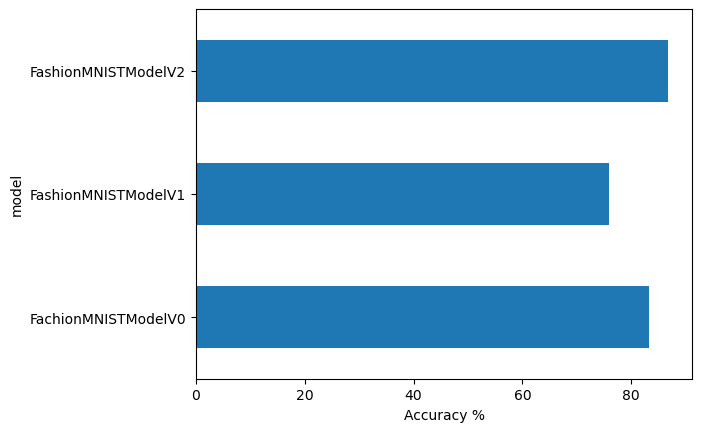

In [103]:
import matplotlib.pyplot as plt
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('Accuracy %')
plt.ylabel('model')


In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [20]:

def make_predictions(model : torch.nn.Module, data: list, device: torch.device = device):
    #model = model.to(device)
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs) 

In [21]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [22]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=loaded_model_2.to(device), 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[4.7619e-07, 1.3019e-08, 6.4191e-08, 1.0224e-08, 5.8931e-09, 9.9925e-01,
         4.8025e-07, 4.9290e-08, 4.7549e-06, 7.4893e-04],
        [3.9654e-02, 7.7856e-01, 7.8665e-03, 6.3269e-02, 2.4573e-02, 1.1329e-03,
         8.1199e-02, 1.9919e-04, 3.1735e-03, 3.7394e-04]])

In [23]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [24]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

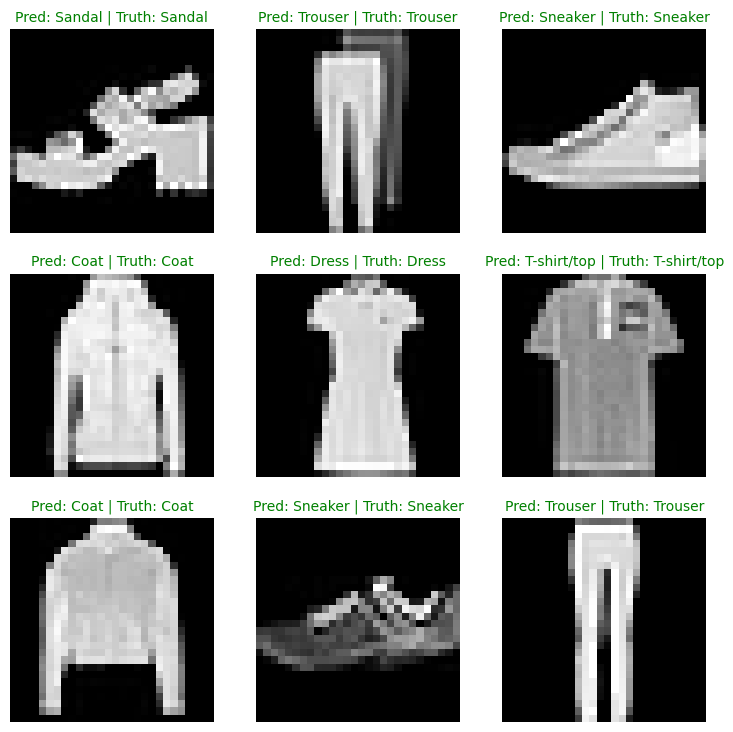

In [25]:
plt.figure(figsize=(9,9))
nrows, ncols = 3, 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows,ncols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c ='g')
    else:
        plt.title(title_text, fontsize=10, c ='r')
    plt.axis(False)    

## Making COnfusion Matrix for further prediction evaluation

In [29]:
from tqdm.auto import tqdm

y_preds = []
loaded_model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader,desc= 'Making predictions'):
        X,y = X.to(device), y.to(device)
        y_logit = loaded_model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)        

Making predictions: 100%|██████████| 313/313 [00:02<00:00, 124.21it/s]


In [30]:
!pip install -U mlxtend

     ---------------------------------------- 1.3/1.3 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 7.3/7.3 MB 2.7 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [32]:
!pip install -q torchmetrics

In [33]:
import torchmetrics, mlxtend

In [34]:
print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.21.0


In [35]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)

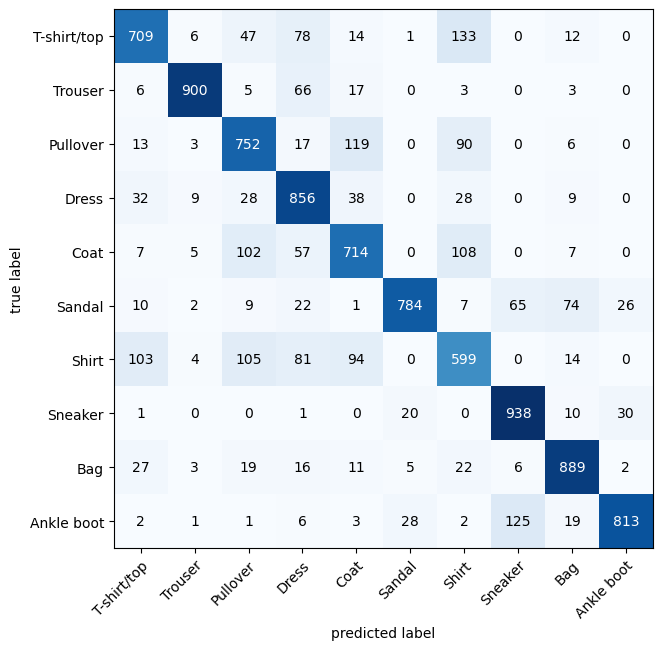

In [37]:
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize= (10,7)
)